In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [141]:
df = pd.read_csv('GoogleSentimentAndStock-updated.csv')

df.columns

Index(['Date', 'score', 'Open', 'High', 'Low', 'Close', 'Next day close',
       'Volume', 'Dividends', 'Stock Splits', 'Unnamed: 10', 'Difference',
       'Unnamed: 12', 'Up/Down'],
      dtype='object')

In [142]:
df.drop('Unnamed: 10',inplace=True,axis=1)
df.drop('Unnamed: 12',inplace=True,axis=1)
df.drop('Difference',inplace =True,axis=1)
df.drop('Dividends',inplace =True,axis=1)
df.drop('Stock Splits',inplace =True,axis=1)
df.drop('Volume',inplace =True,axis=1)

In [143]:
df

,Date,score,Open,High,Low,Close,Next day close,Up/Down
0,1/2/2015,0.693694,26.629999,26.790001,26.393999,26.477501,25.973000,0
1,1/5/2015,1.238095,26.357500,26.399500,25.887501,25.973000,25.332001,0
2,1/6/2015,1.245552,26.025000,26.060499,25.277500,25.332001,25.257500,0
3,1/7/2015,0.831210,25.547501,25.574499,25.182501,25.257500,25.345501,1
4,1/8/2015,0.967245,25.075500,25.375000,24.750999,25.345501,25.035999,0
...,...,...,...,...,...,...,...,...
1251,12/20/2019,0.742857,68.154999,68.199997,67.536499,67.560997,67.531502,0
1252,12/23/2019,0.933333,67.936501,68.092499,67.400002,67.531502,67.221497,0
1253,12/24/2019,0.883117,67.510498,67.600502,67.208504,67.221497,68.123497,1
1254,12/26/2019,1.421429,67.327499,68.160004,67.275497,68.123497,67.732002,0


In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X = df[['score']]
y = df['Up/Down']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=39)

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C=0.1, gamma=1, kernel='linear', random_state=42) # sigmoid Kernel


#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [149]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5570291777188329


In [150]:
y_train_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.5164960182025028


In [151]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5570291777188329
Recall: 1.0


In [152]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

[[  0 167]
 [  0 210]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       167
           1     0.5570    1.0000    0.7155       210

    accuracy                         0.5570       377
   macro avg     0.2785    0.5000    0.3578       377
weighted avg     0.3103    0.5570    0.3986       377



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [154]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [155]:
grid = GridSearchCV(clf,param_grid,refit=True,verbose=3,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma

[CV 2/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.3s
[CV 5/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   9.2s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   5.9s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   8.4s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  10.0s
[CV 5/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  14.7s
[CV 1/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5,
             estimator=SVC(C=0.1, gamma=1, kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [156]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.1, kernel='sigmoid', random_state=42)


In [157]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 79  88]
 [112  98]]
              precision    recall  f1-score   support

           0       0.41      0.47      0.44       167
           1       0.53      0.47      0.49       210

    accuracy                           0.47       377
   macro avg       0.47      0.47      0.47       377
weighted avg       0.48      0.47      0.47       377



In [158]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_validate 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

model = svm.SVC(C=10, gamma=1, kernel='rbf', random_state=42)

results = cross_validate(estimator=model,
                                          X=X,
                                          y=y,
                                          cv=10,
                                          scoring=scoring)

pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.067838,0.156309,0.603175,0.580000,0.878788,0.698795
1,0.062475,0.156248,0.547619,0.539823,0.924242,0.681564
2,0.046852,0.171878,0.587302,0.574257,0.865672,0.690476
3,0.046857,0.171867,0.547619,0.549020,0.835821,0.662722
4,0.046850,0.166166,0.555556,0.553398,0.850746,0.670588
5,0.046845,0.171613,0.595238,0.571429,0.955224,0.715084
6,0.046830,0.171873,0.568000,0.557692,0.878788,0.682353
7,0.046851,0.156245,0.488000,0.509434,0.818182,0.627907
8,0.062481,0.156256,0.496000,0.513514,0.863636,0.644068
9,0.046799,0.171858,0.496000,0.514019,0.833333,0.635838


In [159]:
print("%0.4f accuracy with a standard deviation of %0.2f" % (results['test_accuracy'].mean(), results['test_accuracy'].std()))
print("%0.4f precision with a standard deviation of %0.2f" % (results['test_precision'].mean(), results['test_precision'].std()))
print("%0.4f recall with a standard deviation of %0.2f" % (results['test_recall'].mean(), results['test_recall'].std()))
print("%0.4f f1_score with a standard deviation of %0.2f" % (results['test_f1_score'].mean(), results['test_f1_score'].std()))

0.5485 accuracy with a standard deviation of 0.04
0.5463 precision with a standard deviation of 0.03
0.8704 recall with a standard deviation of 0.04
0.6709 f1_score with a standard deviation of 0.03


In [160]:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(model, X, y, cv=10,
                            scoring=confusion_matrix_scorer)
pd.DataFrame(cv_results)

,fit_time,score_time,test_tn,test_fp,test_fn,test_tp
0,0.060843,0.012961,18,42,8,58
1,0.039555,0.015607,8,52,5,61
2,0.046875,0.015618,16,43,9,58
3,0.046873,0.015620,13,46,11,56
4,0.046871,0.015621,13,46,10,57
5,0.046870,0.015623,11,48,3,64
6,0.046876,0.015630,13,46,8,58
7,0.046858,0.015623,7,52,12,54
8,0.046873,0.015621,5,54,9,57
9,0.046871,0.015623,7,52,11,55


<AxesSubplot:>

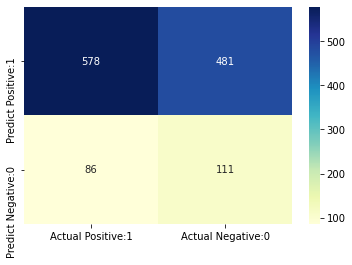

In [161]:
cm = [ [0]*2 for i in range(2)]
cm[0][0]=np.sum(cv_results['test_tp'])
cm[1][1]=np.sum(cv_results['test_tn'])
cm[0][1]=np.sum(cv_results['test_fp'])
cm[1][0]=np.sum(cv_results['test_fn'])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')